In [4]:
# All necessary libraries must be put here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.graph_objects as go
import pandas as pd

In [5]:
# Read the CRSP Data and make it become a dataframe
crsp_data_1993_2019 = pd.read_csv("/Users/namnguyen/Desktop/Research/Don/Imaging_Price_Trends_Code/crsp_data_20240719_1.csv")

# Check the data
crsp_data_1993_2019.head(5)

/var/folders/pl/z1lfm5xs7299k23shpwd6ngh0000gp/T/ipykernel_22954/4244800754.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



,PERMNO,HdrCUSIP,Ticker,PERMCO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen
0,10001,36720410,GFGC,7953,1993-01-04,150.0,14.5,14.50,14.5,14.50
1,10001,36720410,GFGC,7953,1993-01-05,0.0,NaN,NaN,NaN,NaN
2,10001,36720410,GFGC,7953,1993-01-06,0.0,NaN,NaN,NaN,NaN
3,10001,36720410,GFGC,7953,1993-01-07,228.0,14.5,14.50,14.5,14.50
4,10001,36720410,GFGC,7953,1993-01-08,1375.0,14.5,14.25,14.5,14.25


In [43]:
# ### DRAFT VERSION ON A RANDOM SET OF DATA
# ### CAN IGNORE THIS PART
# # Sample data creation
# dates = pd.date_range(start = '2023-01-01', periods = 20)
# data = {
#     "Date": dates,
#     "Open": np.random.uniform(100, 200, size = 20),
#     "High": np.random.uniform(200, 300, size = 20),
#     "Low": np.random.uniform(50, 100, size = 20),
#     "Close": np.random.uniform(100, 250, size = 20),
#     "Volume": np.random.randint(1000, 5000, size = 20)
# }

# df = pd.DataFrame(data, index = pd.DatetimeIndex(data["Date"]))

# # Calculate the 20-day moving average
# df["20_MA"] = df["Close"].rolling(window = 20).mean()

# # Create figure and axis
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (60, 64), gridspec_kw = {"height_ratios": [4, 1]})

# # Plot OHLC
# ax1.plot(df["Date"], df["Close"], label = "Close", color = "white")
# ax1.plot(df["Date"], df["20_MA"], label = "20-Day MA", color = "white", linestyle = '--')
# mpf.plot(df, type = "candle", ax = ax1, volume = False, style = 'charles', show_nontrading = False)
# ax1.set_title('OHLC Chart with 20-Day Moving Average')
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax1.xaxis.set_major_locator(mdates.DayLocator())
# ax1.set_ylabel('Price')
# ax1.legend()

# # Plot Volume
# ax2.bar(df["Date"], df["Volume"], color = "white")

# # Set background color to black
# fig.patch.set_color("black")
# ax1.set_facecolor("black")
# ax2.set_facecolor("black")

# # Save as black and white image
# plt.subplots_adjust(hspace=0.5)
# plt.savefig(f'ohlc_volume_chart_20_days.png', dpi=300, bbox_inches = 'tight')
# plt.show()



In [ ]:
### WE REPLICATE THE IMAGE AGAIN TO CHECK THE FOLLOWING REQUIREMENT:
# 1. IS THE IMAGE SPARSE (MEANS THAT MOST OF PIXELS ARE 0)?
# 2. IS THAT "REALLY" BLACK AND WHITE (0 AND 255), OR UNEXPECTEDLY HAS SOME OTHER NUMBERS?
# 3. DOES THE MOVING AVERAGE SATISFY THE AUTHORS' REQUIREMENTS, WHICH IS STAIRS-STYLE?

In [6]:
# CHECK THE AMOUNT OF PERMNO THAT WE HAVE
unique_id = crsp_data_1993_2019["PERMNO"].unique()
print(unique_id)
print(f"Len of unique ID: {len(unique_id)}")

[10001 10002 10003 ... 93434 93435 93436]
Len of unique ID: 23443


In [7]:
# IN THIS REPLICATION, WE USE ID 10001
crsp_data_1993_2019_10001 = crsp_data_1993_2019[crsp_data_1993_2019["PERMNO"] == 10001]
crsp_data_1993_2019_10001

,PERMNO,HdrCUSIP,Ticker,PERMCO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen
0,10001,36720410,GFGC,7953,1993-01-04,150.0,14.50,14.50,14.50,14.50
1,10001,36720410,GFGC,7953,1993-01-05,0.0,NaN,NaN,NaN,NaN
2,10001,36720410,GFGC,7953,1993-01-06,0.0,NaN,NaN,NaN,NaN
3,10001,36720410,GFGC,7953,1993-01-07,228.0,14.50,14.50,14.50,14.50
4,10001,36720410,GFGC,7953,1993-01-08,1375.0,14.50,14.25,14.50,14.25
...,...,...,...,...,...,...,...,...,...,...
6189,10001,36720410,EGAS,7953,2017-07-31,30166.0,12.95,12.95,13.00,13.00
6190,10001,36720410,EGAS,7953,2017-08-01,153297.0,13.05,12.95,13.10,12.95
6191,10001,36720410,EGAS,7953,2017-08-02,509562.0,13.10,13.05,13.15,13.05
6192,10001,36720410,EGAS,7953,2017-08-03,40610.0,13.10,13.10,13.15,13.10


In [9]:
# DROP NAN IN THE DATASET
crsp_data_1993_2019_10001 = crsp_data_1993_2019_10001.dropna()
crsp_data_1993_2019_10001

,PERMNO,HdrCUSIP,Ticker,PERMCO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen
0,10001,36720410,GFGC,7953,1993-01-04,150.0,14.50,14.50,14.50,14.50
3,10001,36720410,GFGC,7953,1993-01-07,228.0,14.50,14.50,14.50,14.50
4,10001,36720410,GFGC,7953,1993-01-08,1375.0,14.50,14.25,14.50,14.25
5,10001,36720410,GFGC,7953,1993-01-11,200.0,14.50,14.50,14.50,14.50
7,10001,36720410,GFGC,7953,1993-01-13,700.0,13.75,13.75,14.00,14.00
...,...,...,...,...,...,...,...,...,...,...
6188,10001,36720410,EGAS,7953,2017-07-28,9166.0,13.00,12.95,13.00,12.95
6189,10001,36720410,EGAS,7953,2017-07-31,30166.0,12.95,12.95,13.00,13.00
6190,10001,36720410,EGAS,7953,2017-08-01,153297.0,13.05,12.95,13.10,12.95
6191,10001,36720410,EGAS,7953,2017-08-02,509562.0,13.10,13.05,13.15,13.05


In [10]:
# DROP USELESS COLUMNS
crsp_data_1993_2019_10001 = crsp_data_1993_2019_10001.drop(["HdrCUSIP", "Ticker", "PERMCO"], axis = 1)
crsp_data_1993_2019_10001

,PERMNO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen
0,10001,1993-01-04,150.0,14.50,14.50,14.50,14.50
3,10001,1993-01-07,228.0,14.50,14.50,14.50,14.50
4,10001,1993-01-08,1375.0,14.50,14.25,14.50,14.25
5,10001,1993-01-11,200.0,14.50,14.50,14.50,14.50
7,10001,1993-01-13,700.0,13.75,13.75,14.00,14.00
...,...,...,...,...,...,...,...
6188,10001,2017-07-28,9166.0,13.00,12.95,13.00,12.95
6189,10001,2017-07-31,30166.0,12.95,12.95,13.00,13.00
6190,10001,2017-08-01,153297.0,13.05,12.95,13.10,12.95
6191,10001,2017-08-02,509562.0,13.10,13.05,13.15,13.05


In [11]:
# CALCULATE THE 20-DAY MOVING AVERAGE
crsp_data_1993_2019_10001["20_Day_MA_Low"] = crsp_data_1993_2019_10001["DlyLow"].rolling(window = 20).mean().fillna(crsp_data_1993_2019_10001["DlyLow"])
crsp_data_1993_2019_10001

,PERMNO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen,20_Day_MA_Low
0,10001,1993-01-04,150.0,14.50,14.50,14.50,14.50,14.50000
3,10001,1993-01-07,228.0,14.50,14.50,14.50,14.50,14.50000
4,10001,1993-01-08,1375.0,14.50,14.25,14.50,14.25,14.25000
5,10001,1993-01-11,200.0,14.50,14.50,14.50,14.50,14.50000
7,10001,1993-01-13,700.0,13.75,13.75,14.00,14.00,13.75000
...,...,...,...,...,...,...,...,...
6188,10001,2017-07-28,9166.0,13.00,12.95,13.00,12.95,12.86970
6189,10001,2017-07-31,30166.0,12.95,12.95,13.00,13.00,12.87220
6190,10001,2017-08-01,153297.0,13.05,12.95,13.10,12.95,12.87720
6191,10001,2017-08-02,509562.0,13.10,13.05,13.15,13.05,12.88625


In [13]:
# SINCE DACHENG'S EXAMPLE IS 2017, I WANT TO TAKE ONLY 2017 HERE
crsp_data_2017_10001 = crsp_data_1993_2019_10001[crsp_data_1993_2019_10001["DlyCalDt"].str.startswith("2017")]
crsp_data_2017_10001

,PERMNO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen,20_Day_MA_Low
6045,10001,2017-01-03,70124.0,12.60,12.55,12.60,12.55,12.511935
6046,10001,2017-01-04,4013.0,12.55,12.55,12.60,12.60,12.516935
6047,10001,2017-01-05,97588.0,12.70,12.60,12.70,12.60,12.521935
6048,10001,2017-01-06,164633.0,12.70,12.60,12.75,12.65,12.526935
6049,10001,2017-01-09,27508.0,12.60,12.60,12.70,12.70,12.529435
...,...,...,...,...,...,...,...,...
6188,10001,2017-07-28,9166.0,13.00,12.95,13.00,12.95,12.869700
6189,10001,2017-07-31,30166.0,12.95,12.95,13.00,13.00,12.872200
6190,10001,2017-08-01,153297.0,13.05,12.95,13.10,12.95,12.877200
6191,10001,2017-08-02,509562.0,13.10,13.05,13.15,13.05,12.886250


In [15]:
# DACHENG'S WEBSITE ONLY EXPERIMENTS WITH JANUARY, SO I EXTRACT THE DATA THAT IS FROM JAN

crsp_data_012017_10001 = crsp_data_1993_2019_10001[crsp_data_1993_2019_10001["DlyCalDt"].str.startswith("2017-01")]
crsp_data_012017_10001

,PERMNO,DlyCalDt,DlyVol,DlyClose,DlyLow,DlyHigh,DlyOpen,20_Day_MA_Low
6045,10001,2017-01-03,70124.0,12.6000,12.55,12.60,12.55,12.511935
6046,10001,2017-01-04,4013.0,12.5500,12.55,12.60,12.60,12.516935
6047,10001,2017-01-05,97588.0,12.7000,12.60,12.70,12.60,12.521935
6048,10001,2017-01-06,164633.0,12.7000,12.60,12.75,12.65,12.526935
6049,10001,2017-01-09,27508.0,12.6000,12.60,12.70,12.70,12.529435
6050,10001,2017-01-10,92207.0,12.7500,12.65,12.75,12.65,12.534435
6051,10001,2017-01-11,38915.0,12.7000,12.65,12.75,12.75,12.539435
6052,10001,2017-01-12,10891.0,12.6500,12.65,12.75,12.70,12.543490
6053,10001,2017-01-13,166632.0,12.6500,12.55,12.67,12.65,12.543490
6054,10001,2017-01-17,22987.0,12.6000,12.60,12.65,12.65,12.550990


In [42]:
# START PLOTTING THE IMAGE

# Create a figure
fig = go.Figure()

# If we use go.Ohlc directly, there will be gaps between days (this library follows the date in exact order),
# We should specify what dates we want it to appear
x_dates = crsp_data_012017_10001["DlyCalDt"]
all_dates = pd.date_range(start = crsp_data_012017_10001["DlyCalDt"].min(), end = crsp_data_012017_10001["DlyCalDt"].max(), freq = 'D').strftime('%Y-%m-%d')
crsp_data_012017_10001 = crsp_data_012017_10001[crsp_data_012017_10001["DlyCalDt"].isin(x_dates)]

# Add the OHLC bar first
fig.add_trace(go.Ohlc(x = crsp_data_012017_10001["DlyCalDt"], open = crsp_data_012017_10001["DlyOpen"],
                      high = crsp_data_012017_10001["DlyHigh"], low = crsp_data_012017_10001["DlyLow"],
                      close = crsp_data_012017_10001["DlyClose"], name = "OHLC", line = dict(width = 1), 
                      increasing_line_color = "white", decreasing_line_color = "white", 
                      yaxis = "y"))

# Add the moving average line
x_moving_average = crsp_data_012017_10001["DlyCalDt"]
y_moving_average = crsp_data_012017_10001["20_Day_MA_Low"]

# Since x_moving_average and y_moving_average is Series, we convert it to list
x_moving_average_list = x_moving_average.to_list()
y_moving_average_list = y_moving_average.to_list()

## Since we want to make the stair-step effects, we have to extend the x and y arrays
x_stairs = []
y_stairs = []


# # For debugging purpose 
# print(f"Len X Moving Average: {len(x_moving_average)}")
# print(f"Len Y Moving Average: {len(y_moving_average)}")

# print(f"X Moving Average: {(x_moving_average)}")
# print(f"Y Moving Average: {(y_moving_average)}")


for i in range(len(y_moving_average_list)):
    x_stairs.append(x_moving_average_list[i])
    y_stairs.append(y_moving_average_list[i])
    if i == len(y_moving_average_list) - 1:
        x_stairs.append(x_moving_average_list[i])
    else:
        x_stairs.append(x_moving_average_list[i + 1])
    y_stairs.append(y_moving_average_list[i])

## Add the moving average line as a stair step
fig.add_trace(go.Scatter(x = x_stairs, y = y_stairs, name = "20-day-moving-average", line = dict(color = "white", width = 1)))

# Add the volume bar
fig.add_trace(go.Bar(x = crsp_data_012017_10001["DlyCalDt"], y = crsp_data_012017_10001["DlyVol"], yaxis = "y2", name = "Volume", marker = dict(color = "white")))

# Ensure the layout is black, as well as implement OHLC chart, and volume data
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "rangebreaks": [
        dict(values = all_dates[~all_dates.isin(crsp_data_012017_10001["DlyCalDt"].tolist())])
    ],
    "gridcolor": "gray"
    },
    yaxis = {
        'domain': [0.2, 1],
        'range': [min(crsp_data_012017_10001["DlyLow"].min(), crsp_data_012017_10001["DlyOpen"].min(), 
                       crsp_data_012017_10001["DlyClose"].min(), crsp_data_012017_10001["20_Day_MA_Low"].min()), 
                      max(crsp_data_012017_10001["DlyHigh"].max(), crsp_data_012017_10001["DlyOpen"].max(), 
                        crsp_data_012017_10001["DlyClose"].max(), crsp_data_012017_10001["20_Day_MA_Low"].max())],
        'visible': False,
        "gridcolor": "gray"
    },
    yaxis2 = dict(domain = [0, 0.2], visible = False, gridcolor = "gray"),
    width = 60,
    height = 64,
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
)

# Show the figure
fig.show()



Data: [ 1.0246933   0.94302587 -1.68451852 -2.04097627 -2.13957914 -3.43997454
 -3.15123493 -1.69985737 -1.87777555 -2.0476824  -1.49755524  0.59872552
 -0.27807739 -0.71106923 -1.55696811 -1.39323537 -1.09483662 -0.85716705
 -1.01297186 -1.87248376  0.65652864 -0.18795629  0.70270576  1.47470952
  1.49502316 -0.08822697 -0.01278232  0.57933118  0.82011408  0.02356693
 -0.03782869  0.0272709   0.2759207  -0.47880987  1.22062148  0.82787483
 -0.03462037  1.04783558  0.89805336 -0.11673898  0.5722137  -1.76889462
 -1.64275433 -0.44181523  0.52118168  2.11124803  2.72847926  2.25066289
  3.98694229  6.95764215  7.5727767   9.63972021  9.71726344  9.26494436
  8.66738951  9.97615651 10.36203364 10.3548429   9.69185715  8.34481087
  8.24961158  8.02188379  8.45432047  8.92126016  7.58097876  9.00383841
  9.99763569  9.38112483  9.58606259  9.10651706 10.61890327  9.2720642
  6.49132649  6.40185269  6.95999425  7.71571947  8.19393454  8.1400287
  6.89812732  5.23963201  4.88626032  6.5427680

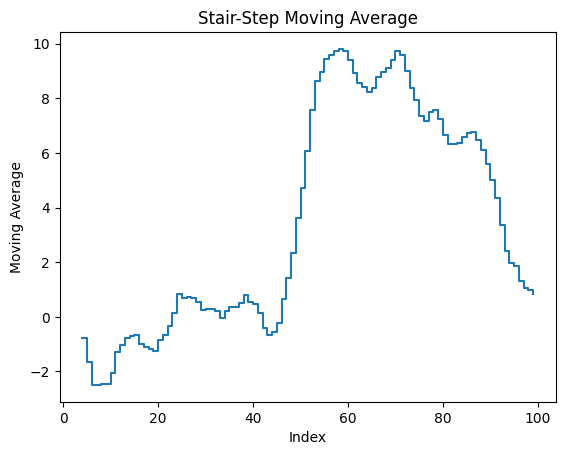

In [28]:
# EXAMPLES OF STEP FUNCTION IMPLEMENTATION. YOU CAN CHOOSE TO UNCOMMENT IF NEEDED
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# data = np.random.randn(100).cumsum()
# window_size = 5

# print(f"Data: {data}")
# print(f"Len Data: {len(data)}")
# # Calculate moving averages
# moving_averages = [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]

# print(f"Moving averages: {moving_averages}")
# print(f"Len Moving averages: {len(moving_averages)}")

# # Create stair-step plot
# plt.step(range(window_size - 1, len(data)), moving_averages, where='post')
# plt.title('Stair-Step Moving Average')
# plt.xlabel('Index')
# plt.ylabel('Moving Average')
# plt.show()